In [1]:
import sys , ROOT
sys.path.insert(0, '/uboone/app/users/ecohen/larlite/UserDev/GBDTprotons/GBDTprotonPackage/mac')
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/GBDTprotons/GBDTprotonPackage/mac')
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/mySoftwarePackage/mac')
import pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from root_pandas import read_root
from root_numpy import tree2array , hist2array
import seaborn as sns
from ROOT import TPlots
import Initiation as init
import my_tools
dirname = init.createnewdir()
%matplotlib inline
# from ROOT import PandoraNuTrack
# from ROOT import cumputeAnaTree
# from ROOT import ImportantTools
# from ROOT import AnalyzeTracksFile

In [2]:
DataName = "MC_BNB"
main_path = "/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna"
anafiles_path = main_path + "/TracksAnaFiles"

In [13]:
ana = TPlots( anafiles_path + "/Tracks_" + DataName + "_AnalysisTrees.root" , 'TracksTree' )
ana_array = tree2array(ana.GetTree(),
                       selection='tracks.dEdx_Y>0.1',
                       branches=['tracks.dEdx_Y','tracks.track_length_Y','MCpdgCode'])

In [4]:
def plot_col2d( var_x , xmin , xmax , nbinsx , x_label , var_y, ymin , ymax , nbinsy , y_label , 
               ana=ana ):
    fig = plt.figure(figsize=[10,5])
    fig, ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'aspect':'equal'})
    h = ana.H2( var_x , var_y ,ROOT.TCut('tracks.dEdx_Y>0.1'),'',nbinsx,xmin,xmax,nbinsy,ymin,ymax)
    H = np.ones((nbinsx,nbinsy))
    for bin_x in range(nbinsx):
        for bin_y in range(nbinsy):
            H[bin_x][bin_y]= float(h.GetBinContent(bin_x,bin_y)) 
    extent = [xmin,xmax,ymin,ymax]
    im = plt.imshow(H,interpolation='none', cmap='CMRmap_r',origin='lower', extent=extent)
    im = ax.imshow(np.ma.masked_where(H==0, H), cmap='CMRmap_r', interpolation='none', origin='lower', extent=extent)
    my_tools.set_axes(ax , x_label , y_label)
    cb = plt.colorbar()
    for t in cb.ax.get_yticklabels():
         t.set_fontsize(20)
    fig.savefig( dirname + "/" + var_x + "_vs_" + var_y + ".pdf" )   

In [ ]:
plot_col2d( 'tracks.track_length_Y' , 0 , 100 , 100 , 'Residual Range [cm]' , 
           'tracks.dEdx_Y', 0 , 50 , 100 , 'dE/dx [MeV/cm]'  )

In [13]:
def plot_scatter2d( var_x , xmin , xmax , nbinsx , x_label , var_y, ymin , ymax , nbinsy , y_label ,
                   MCmode=False ):
    fig = plt.figure(figsize=[10,5])
    fig, ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'aspect':'equal'})
#     if MCmode==False:
#         h = ana.H2( var_x , var_y ,ROOT.TCut(),'',nbinsx,xmin,xmax,nbinsy,ymin,ymax)
#         H = np.ones((nbinsx,nbinsy))
#         for bin_x in range(nbinsx):
#             for bin_y in range(nbinsy):
#                 H[bin_x][bin_y]= float(h.GetBinContent(bin_x,bin_y)) 
    scatter = plt.plot(ana_array['tracks.dEdx_Y'],ana_array['tracks.track_length_Y'])
    my_tools.set_axes(x_label , y_label)
    fig.savefig( dirname + "/" + var_x + "_vs_" + var_y + ".png" )    

In [24]:
# plot_scatter2d('tracks.track_length_Y' , 0 , 100 , 100 , 'Residual Range [cm]' , 
#                'tracks.dEdx_Y', 0 , 50 , 50 , 'dE/dx [MeV/cm]' )
# sns.jointplot('tracks.dEdx_Y','tracks.track_length_Y',ana_array)
# ana_array['tracks.track_length_Y']
# plt.scatter(ana_array['tracks.track_length_Y'],ana_array['tracks.dEdx_Y']);

In [12]:
len(ana_array['tracks.track_length_Y'])

NameError: name 'ana_array' is not defined

In [26]:
len(ana_array['tracks.dEdx_Y'])

611420

In [4]:
evnts_frac = 0.01
ana_pandoranu = AnalyzeTracksFile( anafiles_path , DataName  )
Nentries = ana_pandoranu.GetEntries()
Nreduced = int(evnts_frac*Nentries)

In [5]:
# ana = TPlots( anafiles_path + "/Tracks_" + DataName + "_AnalysisTrees.root" , 'TracksTree')
# df = read_root(anafiles_path + "/Tracks_" + DataName + "_AnalysisTrees.root",
#                key='TracksTree',
#                columns=['run','subrun','event','tracks.track_length_Y'])
h = hist2array(ana.H2('tracks.track_length_Y','tracks.dEdx_Y',ROOT.TCut('tracks.dEdx_Y>0'),'goff',10,0,100,10,0,100))

In [10]:
h

array([[  3.79713300e+06,   7.60141000e+05,   1.39728000e+05,
          4.88870000e+04,   1.81960000e+04,   9.81000000e+03,
          6.61900000e+03,   4.75100000e+03,   3.60200000e+03,
          2.90500000e+03],
       [  3.22115800e+06,   4.99720000e+04,   1.32590000e+04,
          6.59300000e+03,   3.95100000e+03,   2.69600000e+03,
          1.94900000e+03,   1.50400000e+03,   1.22500000e+03,
          1.02600000e+03],
       [  2.47650500e+06,   2.70850000e+04,   7.66100000e+03,
          3.95500000e+03,   2.26600000e+03,   1.57800000e+03,
          1.10200000e+03,   8.92000000e+02,   6.62000000e+02,
          5.18000000e+02],
       [  1.98821900e+06,   1.83800000e+04,   5.15200000e+03,
          2.57200000e+03,   1.59000000e+03,   1.00600000e+03,
          7.06000000e+02,   5.53000000e+02,   3.79000000e+02,
          3.36000000e+02],
       [  1.65900300e+06,   1.40780000e+04,   3.60000000e+03,
          1.72500000e+03,   1.05200000e+03,   7.27000000e+02,
          4.42000000e+02

In [11]:
h[0]

array([  3.79713300e+06,   7.60141000e+05,   1.39728000e+05,
         4.88870000e+04,   1.81960000e+04,   9.81000000e+03,
         6.61900000e+03,   4.75100000e+03,   3.60200000e+03,
         2.90500000e+03], dtype=float32)

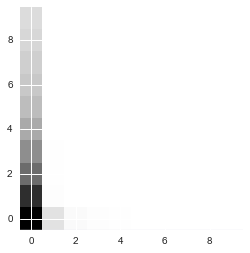

In [6]:
im = plt.imshow(h, interpolation='none', origin='low')

In [17]:
ana_array;

ValueError: setting an array element with a sequence.

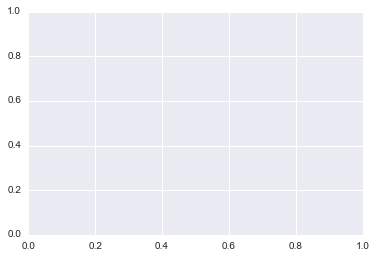

In [29]:
len(ana_array)
plt.plot(ana_array['tracks.track_length_Y'],ana_array['tracks.dEdx_Y'])

In [26]:
track_length_Y = ana_array['tracks.track_length_Y'].flatten()

In [38]:
track_length_Y = np.concatenate(ana_array['tracks.track_length_Y']).ravel().tolist()
dEdx_Y = np.concatenate(ana_array['tracks.dEdx_Y']).ravel().tolist()
x = track_length_Y[0:2000]
y = dEdx_Y[0:2000]

(0, 100)

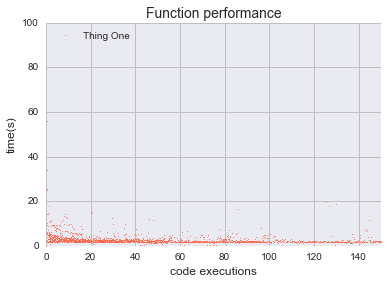

In [48]:
fig, ax = plt.subplots()
ax.set_title("Function performance",fontsize=14)
ax.set_xlabel("code executions",fontsize=12)
ax.set_ylabel("time(s)",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')

colors = ['tomato']#, 'violet', 'blue', 'green']
labels = ['Thing One']#, 'Thing Two', 'Thing Three', 'Thing Four']
for func, color, label in zip([y], colors, labels):
    ax.plot( x, func , 'o', color=color, markersize=1, label=label)

ax.legend(numpoints=1, loc='upper left')
ax.set_xlim([0, 150])
ax.set_ylim([0, 100])

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Function performance",fontsize=14)
ax.set_xlabel("code executions",fontsize=12)
ax.set_ylabel("time(s)",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
x = track_length_Y[0:2000]
y = dEdx_Y[0:2000]

colors = ['tomato']#, 'violet', 'blue', 'green']
labels = ['Thing One']#, 'Thing Two', 'Thing Three', 'Thing Four']
for func, color, label in zip([y], colors, labels):
    ax.plot( x, func , 'o', color=color, markersize=1, label=label)

ax.legend(numpoints=1, loc='upper left')
ax.set_xlim([0, 150])
ax.set_ylim([0, 100])